In [7]:
# !pip install langchain
!pip install tabulate


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from dotenv import load_dotenv, find_dotenv
import pandas as pd

load_dotenv(find_dotenv())

False

In [9]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import create_pandas_dataframe_agent

In [10]:
df = pd.read_csv("../OpenAI/01-NLP-to-SQL/sales_data_sample.csv")
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [11]:
chat = ChatOpenAI(model_name="gpt-4", temperature= 0.0)
agent = create_pandas_dataframe_agent(chat, df, verbose=True)

In [12]:
agent.run("What is the total average monthly sales?")



> Entering new AgentExecutor chain...
Thought: To find the total average monthly sales, I need to group the data by month and year, then calculate the average sales for each group. I can do this using the groupby and mean functions in pandas.
Action: python_repl_ast
Action Input: df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].mean()
Observation: YEAR_ID  MONTH_ID
2003     1           3327.015385
         2           3435.029024
         3           3490.098000
         4           3476.026724
         5           3321.950172
         6           3653.968696
         7           3754.637600
         8           3410.505172
         9           3473.333684
         10          3596.778291
         11          3479.181284
         12          3741.092286
2004     1           3478.872747
         2           3621.157326
         3           3673.816607
         4           3221.064375
         5           3695.113378
         6           3372.637882
         7           3594.990000
       

'The total average monthly sales is approximately 3561.69.'



> Entering new AgentExecutor chain...
Thought: To create a sales time series plot, I need to first convert the 'ORDERDATE' column to datetime format, then group the data by 'ORDERDATE' and sum the 'SALES' for each date. After that, I can plot the data.
Action: python_repl_ast
Action Input: df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
Observation: NameError: name 'pd' is not defined
Thought:I forgot to import the pandas library. I need to import it before I can use it.
Action: python_repl_ast
Action Input: import pandas as pd
Observation: 
Thought:Now that I have imported pandas, I can convert the 'ORDERDATE' column to datetime format.
Action: python_repl_ast
Action Input: df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
Observation: 
Thought:Now that the 'ORDERDATE' column is in datetime format, I can group the data by 'ORDERDATE' and sum the 'SALES' for each date.
Action: python_repl_ast
Action Input: sales_time_series = df.groupby('ORDERDATE')['SALES'].sum()
Observation: 
Tho

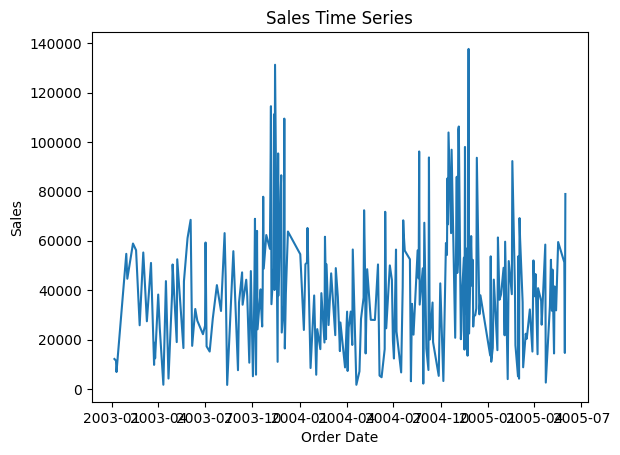

Now that I have imported matplotlib, I can use it to plot the sales time series data.
Action: python_repl_ast
Action Input: plt.plot(sales_time_series)
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Time Series')
plt.show()
Observation: 
Thought:I now know the final answer
Final Answer: I have plotted the sales time series.

> Finished chain.


'I have plotted the sales time series.'

In [13]:
agent.run("Give me a sales time series plot")



> Entering new AgentExecutor chain...
Thought: To create a time series plot of annual sales, I first need to convert the 'ORDERDATE' column to datetime format. Then, I need to group the data by year and sum the 'SALES' for each year. Finally, I can plot the data.
Action: python_repl_ast
Action Input: df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
Observation: 
Thought:The 'ORDERDATE' column should now be in datetime format. Now, I need to create a new column 'YEAR' to store the year part of the 'ORDERDATE'. Then, I can group the data by 'YEAR' and sum the 'SALES' for each year.
Action: python_repl_ast
Action Input: df['YEAR'] = df['ORDERDATE'].dt.year
Observation: 
Thought:The 'YEAR' column should now be created. Now, I can group the data by 'YEAR' and sum the 'SALES' for each year.
Action: python_repl_ast
Action Input: annual_sales = df.groupby('YEAR')['SALES'].sum()
Observation: 
Thought:The 'annual_sales' variable should now contain the total sales for each year. Now, I can plo

'The annual sales time series plot has been created.'

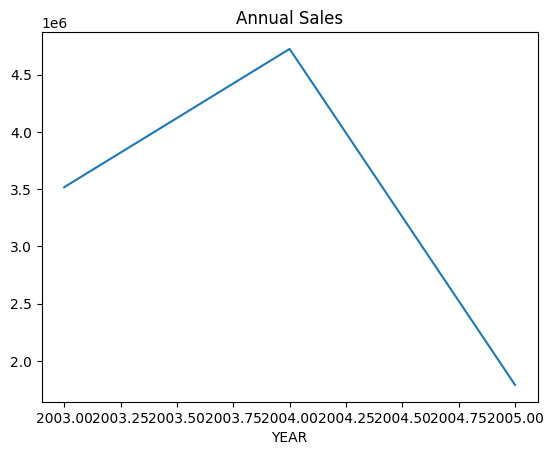

In [14]:
agent.run("Give me a annual sales time series plot")



> Entering new AgentExecutor chain...
Thought: To create a sales time series plot for the first year, I need to first filter the dataframe to only include data from the first year. Then, I can use matplotlib to create the plot. However, before doing that, I need to check the data type of the 'ORDERDATE' column to ensure it is in datetime format.
Action: python_repl_ast
Action Input: df['ORDERDATE'].dtype
Observation: datetime64[ns]
Thought:The 'ORDERDATE' column is already in datetime format. Now, I can filter the dataframe to only include data from the first year. The first year in the dataset is 2003.
Action: python_repl_ast
Action Input: df_2003 = df[df['YEAR_ID'] == 2003]
Observation: 
Thought:

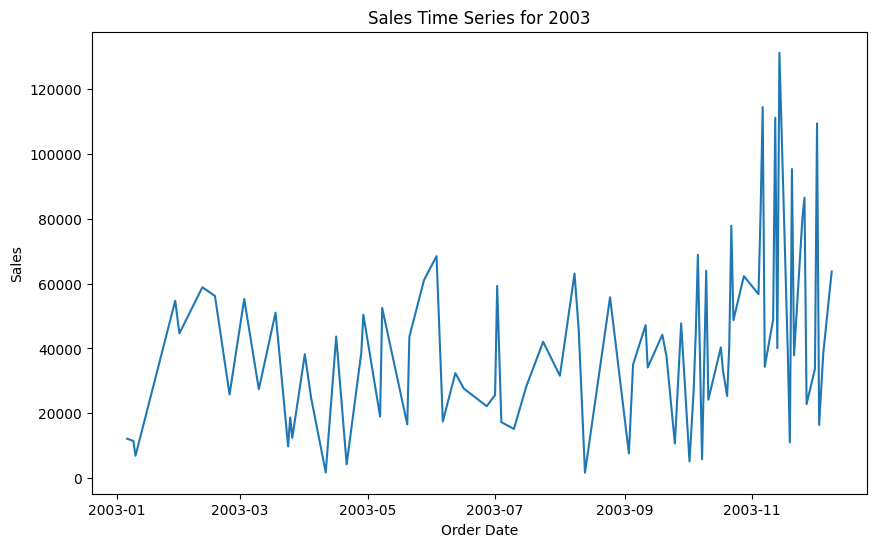

I have successfully filtered the dataframe to only include data from the year 2003. Now, I can create a time series plot of sales for this year. I will group the data by 'ORDERDATE' and sum the 'SALES' for each date. Then, I will plot the resulting series.
Action: python_repl_ast
Action Input: 
import matplotlib.pyplot as plt

# Group by 'ORDERDATE' and sum 'SALES'
sales_2003 = df_2003.groupby('ORDERDATE')['SALES'].sum()

# Create plot
plt.figure(figsize=(10,6))
plt.plot(sales_2003)
plt.title('Sales Time Series for 2003')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()
Observation: 
Thought:The plot shows the sales time series for the year 2003. The x-axis represents the order date and the y-axis represents the sales. The plot shows how sales have changed over time in 2003.
Final Answer: The sales time series plot for the year 2003 has been successfully created.

> Finished chain.


'The sales time series plot for the year 2003 has been successfully created.'

In [15]:
agent.run("Give me a sales time series plot only for the first year")